In [1]:
#pip install category-encoders

In [2]:
############## Importing Libraries ##############
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
############## Importing Dataset ##############
dataset = pd.read_csv('Dataset.csv')
dataset.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,...,8,No,0,150.0,No,2-High,Other,Other,Yes,Yes
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,...,7,No,0,80.0,No,2-High,Suburban,Other,No,No
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,...,0,No,0,130.0,No,5-Low,Suburban,Other,Yes,No
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,...,8,No,0,150.0,No,2-High,Town,Other,Yes,No
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,...,0,No,0,30.0,No,5-Low,Other,Other,Yes,No


# Data Preprocessing

### General Exploration and Encoding Categorical Data

In [4]:
dataset.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnsweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
  

In [5]:
dataset.shape

(6380, 57)

In [6]:
dataset.columns.to_series().groupby(dataset.dtypes).groups

{int64: ['MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating'], float64: ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnsweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'AgeHH1', 'AgeHH2', 'HandsetPrice'], object: ['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam'

In [7]:
dataset.dtypes

MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnsweredCalls                float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
Handsets                       int64
HandsetModels                  int64
C

In [8]:
dataset.dtypes.value_counts()

float64    24
object     22
int64      11
dtype: int64

In [9]:
dataset.select_dtypes(include=['object']).describe()

,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
count,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,...,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380
unique,519,2,2,2,2,2,1,2,2,2,...,2,2,2,2,2,7,4,8,2,2
top,NYCBRO917,No,No,Yes,No,No,Known,No,No,No,...,Yes,No,No,No,No,2-High,Other,Other,Yes,No
freq,207,4856,5514,5742,5181,5854,6380,4098,3990,6283,...,4294,5112,5506,6292,6162,2309,3083,4750,4804,4569


In [10]:
for i in dataset.columns:
    print(f"Unique {i}'s count: {dataset[i].nunique()}")
    print(f"{dataset[i].unique()}\n")

Unique MonthlyRevenue's count: 4066
[ 30.88  44.83  42.63 ...  12.29  99.61 103.63]

Unique MonthlyMinutes's count: 1619
[ 436.  172.  838. ... 2183. 2821. 1071.]

Unique TotalRecurringCharge's count: 153
[ 30.   45.   50.   60.   55.   22.   40.   10.   32.   38.   44.  102.
  70.   20.   54.   72.   57.   42.   46.   82.   25.    0.   95.   68.
  15.   17.   83.   59.   93.   52.   36.   90.   86.   58.   34.   29.
  75.   63.   67.  120.  135.    2.   28.   74.   35.   80.   85.   21.
  56.  142.  150.   77.   61.  111.   76.   47.1  92.   43.   48.   66.
 140.   16.   49.   96.  108.  110.  112.   37.  118.   53.   89.    6.
  78.   47.   12.   19.   81.   41.   71.   39.    5.  100.   65.   51.
  13.  105.   88.   23.  121.    8.   33.  115.   79.   98.    7.   64.
  14.  126.  160.   84.  101.   27.   69.  400.   91.   31.   -6.   62.
  24.  149.   18.   99.  175.  145.  144.   73.   26.  274.    9.  213.
 161.  125.    3.  104.  138.   87.  186.   11.  107.  130.  180.   97.
  9

In [11]:
dataset["ServiceArea"].value_counts()

NYCBRO917    207
DALDAL214    191
HOUHOU281    160
NYCMAN917    143
APCFCH703    116
            ... 
LAXPSG760      1
SANCOC254      1
SHEFTR540      1
NORZIM763      1
PHIGEO302      1
Name: ServiceArea, Length: 519, dtype: int64

In [12]:
dataset["ServiceArea"].duplicated().any()

True

In [13]:
dataset.columns.get_loc("ServiceArea")

24

In [14]:
dataset["ServiceArea"].dtype

dtype('O')

In [15]:
dataset["ServiceArea"] = dataset["ServiceArea"].astype("category")

In [16]:
dataset["ServiceArea"] = pd.DataFrame(data = dataset["ServiceArea"].cat.codes, columns= ["ServiceArea"])

In [17]:
dataset["ServiceArea"].head()

0     24
1    229
2    401
3    317
4     92
Name: ServiceArea, dtype: int16

In [18]:
dataset['ServiceArea'].value_counts()

320    207
92     191
167    160
326    143
24     116
      ... 
216      1
439      1
494      1
315      1
410      1
Name: ServiceArea, Length: 519, dtype: int64

In [19]:
# all categorical variables take on 2 values (mostly yes/no) — therefore are transformed to binary
# and variables with more than 2 values are transformed to integers

In [20]:
# Below are all the steps to Transform categorical variables into Binary/Integers:

In [21]:
# creating instance of labelencoder
le = LabelEncoder()

In [22]:
dataset['ChildrenInHH'].value_counts()

No     4856
Yes    1524
Name: ChildrenInHH, dtype: int64

In [23]:
le.fit(dataset['ChildrenInHH'])
dataset['ChildrenInHH'] = le.transform(dataset['ChildrenInHH'])

In [24]:
dataset['HandsetRefurbished'].value_counts()

No     5514
Yes     866
Name: HandsetRefurbished, dtype: int64

In [25]:
le.fit(dataset['HandsetRefurbished'])
dataset['HandsetRefurbished'] = le.transform(dataset['HandsetRefurbished'])

In [26]:
dataset['HandsetWebCapable'].value_counts()

Yes    5742
No      638
Name: HandsetWebCapable, dtype: int64

In [27]:
le.fit(dataset['HandsetWebCapable'])
dataset['HandsetWebCapable'] = le.transform(dataset['HandsetWebCapable'])

In [28]:
dataset['TruckOwner'].value_counts()

No     5181
Yes    1199
Name: TruckOwner, dtype: int64

In [29]:
le.fit(dataset['TruckOwner'])
dataset['TruckOwner'] = le.transform(dataset['TruckOwner'])

In [30]:
dataset['RVOwner'].value_counts()

No     5854
Yes     526
Name: RVOwner, dtype: int64

In [31]:
le.fit(dataset['RVOwner'])
dataset['RVOwner'] = le.transform(dataset['RVOwner'])

In [32]:
dataset['Homeownership'].value_counts()

Known    6380
Name: Homeownership, dtype: int64

In [33]:
le.fit(dataset['Homeownership'])
dataset['Homeownership'] = le.transform(dataset['Homeownership'])

In [34]:
dataset['BuysViaMailOrder'].value_counts()

No     4098
Yes    2282
Name: BuysViaMailOrder, dtype: int64

In [35]:
le.fit(dataset['BuysViaMailOrder'])
dataset['BuysViaMailOrder'] = le.transform(dataset['BuysViaMailOrder'])

In [36]:
dataset['RespondsToMailOffers'].value_counts()

No     3990
Yes    2390
Name: RespondsToMailOffers, dtype: int64

In [37]:
le.fit(dataset['RespondsToMailOffers'])
dataset['RespondsToMailOffers'] = le.transform(dataset['RespondsToMailOffers'])

In [38]:
dataset['OptOutMailings'].value_counts()

No     6283
Yes      97
Name: OptOutMailings, dtype: int64

In [39]:
le.fit(dataset['OptOutMailings'])
dataset['OptOutMailings'] = le.transform(dataset['OptOutMailings'])

In [40]:
dataset['NonUSTravel'].value_counts()

No     6025
Yes     355
Name: NonUSTravel, dtype: int64

In [41]:
le.fit(dataset['NonUSTravel'])
dataset['NonUSTravel'] = le.transform(dataset['NonUSTravel'])

In [42]:
dataset['OwnsComputer'].value_counts()

No     5203
Yes    1177
Name: OwnsComputer, dtype: int64

In [43]:
le.fit(dataset['OwnsComputer'])
dataset['OwnsComputer'] = le.transform(dataset['OwnsComputer'])

In [44]:
dataset['HasCreditCard'].value_counts()

Yes    4294
No     2086
Name: HasCreditCard, dtype: int64

In [45]:
le.fit(dataset['HasCreditCard'])
dataset['HasCreditCard'] = le.transform(dataset['HasCreditCard'])

In [46]:
dataset['NewCellphoneUser'].value_counts()

No     5112
Yes    1268
Name: NewCellphoneUser, dtype: int64

In [47]:
le.fit(dataset['NewCellphoneUser'])
dataset['NewCellphoneUser'] = le.transform(dataset['NewCellphoneUser'])

In [48]:
dataset['NotNewCellphoneUser'].value_counts()

No     5506
Yes     874
Name: NotNewCellphoneUser, dtype: int64

In [49]:
le.fit(dataset['NotNewCellphoneUser'])
dataset['NotNewCellphoneUser'] = le.transform(dataset['NotNewCellphoneUser'])

In [50]:
dataset['OwnsMotorcycle'].value_counts()

No     6292
Yes      88
Name: OwnsMotorcycle, dtype: int64

In [51]:
le.fit(dataset['OwnsMotorcycle'])
dataset['OwnsMotorcycle'] = le.transform(dataset['OwnsMotorcycle'])

In [52]:
dataset['MadeCallToRetentionTeam'].value_counts()

No     6162
Yes     218
Name: MadeCallToRetentionTeam, dtype: int64

In [53]:
le.fit(dataset['MadeCallToRetentionTeam'])
dataset['MadeCallToRetentionTeam'] = le.transform(dataset['MadeCallToRetentionTeam'])

In [54]:
dataset['MadeCallToRetentionTeam'].dtypes

dtype('int32')

In [55]:
dataset['CreditRating'].value_counts()

2-High       2309
3-Good       1093
1-Highest    1093
5-Low         855
4-Medium      646
7-Lowest      245
6-VeryLow     139
Name: CreditRating, dtype: int64

In [56]:
dataset['CreditRating'] = dataset['CreditRating'].apply(lambda v : int(v.split('-')[0]) if v else np.nan)

In [57]:
dataset["CreditRating"].dtypes

dtype('int64')

In [58]:
dataset['PrizmCode'].value_counts()

Other       3083
Suburban    2056
Town         959
Rural        282
Name: PrizmCode, dtype: int64

In [59]:
# converting type of column to 'category' as by default it's 'object'
dataset['PrizmCode'] = dataset['PrizmCode'].astype('category')

In [60]:
le.fit(dataset['PrizmCode'])
dataset['PrizmCode'] = le.transform(dataset['PrizmCode'])

In [61]:
dataset['Occupation'].value_counts()

Other         4750
Professiol    1061
Crafts         192
Clerical       112
Self           108
Retired         84
Student         47
Homemaker       26
Name: Occupation, dtype: int64

In [62]:
# converting type of column to 'category' as by default it's 'object'
dataset['Occupation'] = dataset['Occupation'].astype('category')

In [63]:
le.fit(dataset['Occupation'])
dataset['Occupation'] = le.transform(dataset['Occupation'])

In [64]:
dataset['MaritalStatus'].value_counts()

Yes    4804
No     1576
Name: MaritalStatus, dtype: int64

In [65]:
le.fit(dataset['MaritalStatus'])
dataset['MaritalStatus'] = le.transform(dataset['MaritalStatus'])

In [66]:
dataset['Churn'].value_counts()

No     4569
Yes    1811
Name: Churn, dtype: int64

In [67]:
le.fit(dataset['Churn'])
dataset['Churn'] = le.transform(dataset['Churn'])

In [68]:
# 0 is 'No' and 1 is 'Yes'
dataset['Churn'].value_counts()

0    4569
1    1811
Name: Churn, dtype: int64

In [69]:
# As you can clearly see below, the dataset is quite imbalanced:

In [70]:
# The Number of Customer's Churning is very less than the Customer's Churning (more than half a difference)
dataset["Churn"].value_counts()

0    4569
1    1811
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

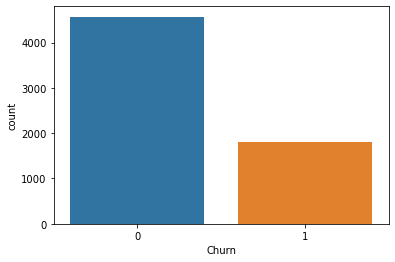

In [71]:
# Target variable distribution is showing that the dataset is imbalanced:
sns.countplot(x=dataset.Churn)

In [72]:
dataset.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,...,8,0,0,150.0,0,2,0,3,1,1
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,...,7,0,0,80.0,0,2,2,3,0,0
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,...,0,0,0,130.0,0,5,2,3,1,0
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,...,8,0,0,150.0,0,2,3,3,1,0
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,...,0,0,0,30.0,0,5,0,3,1,0


In [73]:
# To save the final dataset to your preferred location, please change the file location
# This dataset will be used in Step 3: Classification without Feature Selection

dataset.to_csv(r'C:\Users\Admin\Downloads\Customer_Churn_Final_Dataset.csv', index = False)